# Pythonによるベイズ統計モデリング（第1章）

In [1]:
import plotly
import daft
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from scipy import stats
from plotly import tools
from matplotlib import rc
from matplotlib.ticker import *
import matplotlib as mpl
rc("font", family="Ricty", size=15)
rc('text', usetex=True)
mpl.rcParams['text.usetex'] = True
import warnings
warnings.filterwarnings('ignore')

## グラフィカルモデル可視化

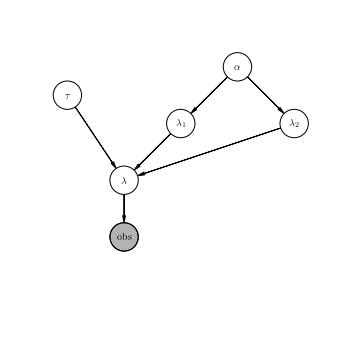

In [2]:
pgm = daft.PGM(shape=[6,6])

# Nodes
pgm.add_node(daft.Node("alpha", r"$\alpha$", 4, 5))
pgm.add_node(daft.Node("tau", r"$\tau$", 1, 4.5))
pgm.add_node(daft.Node("lambda_1", r"$\lambda_1$", 3, 4))
pgm.add_node(daft.Node("lambda_2", r"$\lambda_2$", 5, 4))
pgm.add_node(daft.Node("lambda",  r"$\lambda$", 2, 3))
pgm.add_node(daft.Node("obs", "obs", 2, 2, observed=True))

# Edges
pgm.add_edge("alpha", "lambda_1")
pgm.add_edge("alpha", "lambda_2")
pgm.add_edge("tau", "lambda")
pgm.add_edge("lambda_1", "lambda")
pgm.add_edge("lambda_2", "lambda")
pgm.add_edge("lambda", "obs")

# visualize
pgm.render()

## コイン投げ問題
- 確率的に2値のいずれかの結果が得られる試行をN回繰り返したデータを使用
- 問題設定
    - この2値は平等な確率で現れるのか？
    - この2値はどれほど偏っているのか？
- e.g. コインの裏表/偽物と本物/安全と危険/健康と不健康
- 統計モデルは二項分布
- 自然共役事前分布はベータ分布

In [3]:
# 二項分布
df = pd.DataFrame({
    'inde'
})

n, p = 36, .5 
# 36回 コインを投げた場合、表or裏が出る回数 。 1000セット実行する 。
s = np.random.binomial(n, p, 1000)
print(s)


mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]

tr_sepal_length = go.Histogram(
    name='sepal length (cm)', 
    x=df_iris['sepal length (cm)'], 
    nbinsx=sturges_bins,
    opacity=0.75
)
tr_sepal_width = go.Histogram(
    name='sepal width (cm)', 
    x=df_iris['sepal width (cm)'], 
    nbinsx=sturges_bins,
    opacity=0.75
)
tr_petal_length = go.Histogram(
    name='petal length (cm)', 
    x=df_iris['petal length (cm)'], 
    nbinsx=sturges_bins,
    opacity=0.75
)
tr_petal_width = go.Histogram(
    name='petal width (cm)', 
    x=df_iris['petal width (cm)'], 
    nbinsx=sturges_bins,
    opacity=0.75
)

fig = tools.make_subplots(rows=2, cols=2)
fig.append_trace(tr_sepal_length, 1, 1)
fig.append_trace(tr_sepal_width, 1, 2)
fig.append_trace(tr_petal_length, 2, 1)
fig.append_trace(tr_petal_width, 2, 2)

fig['layout']['xaxis1'].update(title='cm')
fig['layout']['xaxis2'].update(title='cm')
fig['layout']['xaxis3'].update(title='cm')
fig['layout']['xaxis4'].update(title='cm')

fig['layout']['yaxis1'].update(title='度数')
fig['layout']['yaxis2'].update(title='度数')
fig['layout']['yaxis3'].update(title='度数')
fig['layout']['yaxis4'].update(title='度数')

fig['layout'].update(title='説明変数のヒストグラム', width=1600, height=1400,
                     font={"family":"Yu Gothic Bold, sans-selif", "size":25})
py.iplot(fig, show_link=False)




[21 18 19 19 19 18 19 21 20 21 24 19 19 18 13 15 20 16 18 17 17 14 15 20
 14 19 18 12 23 17 19 16 21 16 22 14 20 17 11 16 23 18 21 21 17 16 14 11
 15 18 21 19 21 12 22 19 19 16 15 17 15 17 23 22 16 20 22 22 17 21 21 15
 14 23 20 18 19 12 18 19 21 21 18 17 22 13 12 24 18 19 15 16 18 19 18 17
 15 18 24 20 19 16 22 15 17 17 24 19 16 25 16 15 17 16 17 22 17 19 17 20
 21 22 18 17 19 16 17 21 18 20 22 16 19 19 19 19 18 24 21 15 19 13 21 14
 17 11 18 19 17 14 17 20 16 21 12 18 19 16 21 21 21 18 16 13 17 14 16 18
 16 15 19 13 22 14 24 20 15 17 20 18 21 18 22 14 19 16 12 15 16 18 17 21
 15 18 22 18 21 18 21 19 20 17 15 17 19 18 21 15 15 24 19 18 11 15 19 22
 19 16 18 18 16 16 17 19 18 17 23 20 21 17 20 18 21 12 22 24 19 15 18 19
 16 16 17 18 13 14 13 20 19 18 17 20 17 17 19 19 19 16 24 22 18 19 18 22
 18 18 17 14 19 20 17 20 16 16 21 20 16 20 17 14 16 10 16 20 13 16 15 24
 20 15 15 19 15 21 17 19 19 15 16 16 16 23 22 22 18 18 20 15 15 20 15 19
 16 17 19 19 19 22 15 20 17 18 20 17 18 13 20 22 22

NameError: name 'df_iris' is not defined